<font color = Blue size=6>**Pytorch提供之torchvision data augumentation技巧**</font>

<font color = black size=4>利用torchvision模組進行影像的資料擴增，本篇文章將詳細介紹在torchvision下使用到的函數。

Reference: https://pytorch.org/docs/stable/torchvision/transforms.html
</font>

<font color = black size=5> Function包含 </font><br>
**<font color = blue size=4> * Numpy image 和 PIL image轉換</font>** <br>
**<font color = blue size=4> * 影像 Normalize </font>**<br>
**<font color = blue size=4> * 影像 Resize </font>**<br>
**<font color = blue size=4> * 影像 CenterCrop</font>**<br>
**<font color = blue size=4> * 影像 Pad </font>**<br>
**<font color = blue size=4> * 影像 RandomCrop </font>**<br>
**<font color = blue size=4> * 影像 RandomHorizontalFlip 和 RandomVerticalFlip </font>**<br>
**<font color = blue size=4> * 影像 RandomResizedCrop </font>**<br>
**<font color = blue size=4> * 影像 TenCrop </font>**<br>
**<font color = blue size=4> * 影像 GaussianBlur </font>**<br>
**<font color = blue size=4> * 影像 RandomAffine </font>**<br>
**<font color = blue size=4> * 影像 Grayscale 和 RandomGrayscale </font>**<br>
**<font color = blue size=4> * 影像 RandomPerspective </font>**<br>
**<font color = blue size=4> * 影像 ColorJitter </font>**<br>
**<font color = blue size=4> * 影像 RandomRotation </font>**<br>

<font color = black size=5> 將轉換的function組合串起來使用 </font><br>
**<font color = blue size=4> * 影像 RandomApply </font>**<br>
**<font color = blue size=4> * 影像 RandomChoice 和 RandomOrder </font>**<br>


><font color = Red size=5>**注意:**</font>
<font color = black size=4>torchvision基本上是PIL模組裡面提供的函數進行影像轉換<br>
    只是torchvision將PIL的function包裝成在torchvision的class(functional)方式進行宣告<br>
    然後套用transforms.Compose將所有的處理包裝成一個fun，以方便後續的程式操作
</font>


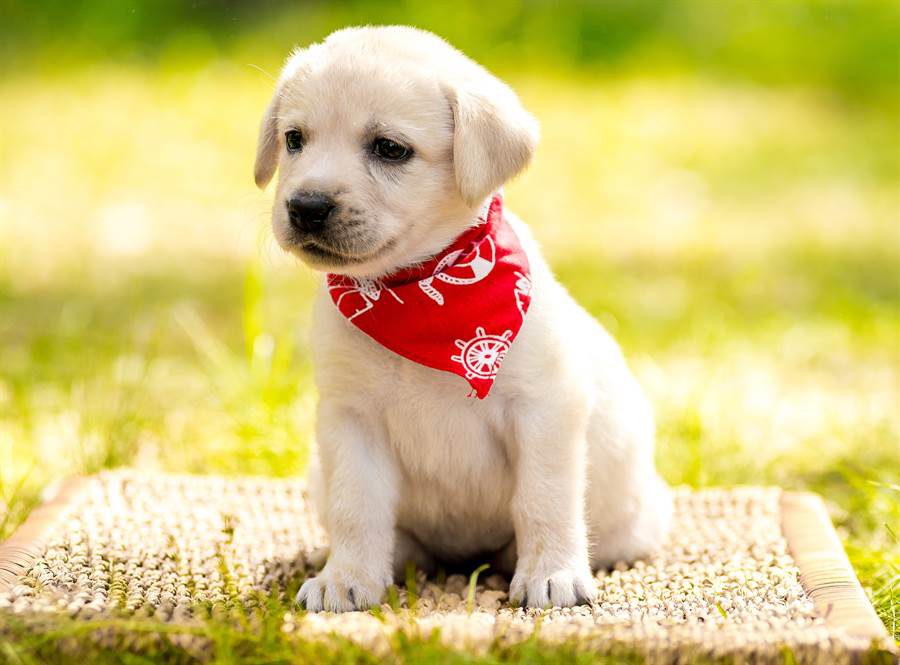

In [29]:
import PIL.Image as Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
imagepath='./image/dog.png'

    
# read image with PIL module
img_pil = Image.open(imagepath, mode='r')
img_pil = img_pil.convert('RGB')
img_pil


<br>**<font color = blue size=5>torchvision模組import</font>**<br/>  


In [2]:
from torchvision import transforms
from torchvision.transforms import functional as TF

<br>**<font color = blue size=5>* Numpy image 和 PIL image轉換</font>**

<br><font color = black size=4>- PIL image 轉換成 Numpy array</font>
<br><font color = black size=4>- Numpy array 轉換成 PIL image</font> 

In [3]:
trans_toPIL = transforms.ToPILImage() # 將  "pytoch tensor" 或是  "numpy.ndarray" 轉換成 PIL Image.
img_np = np.asarray(img_pil) # 將PIL image轉換成  "numpy.ndarray" 
print('image type before convert:{}'.format(type(img_np)))
img_pil = trans_toPIL(img_np)
print('image type after convert:{}'.format(type(img_pil)))


image type before convert:<class 'numpy.ndarray'>
image type after convert:<class 'PIL.Image.Image'>


<br>**<font color = blue size=5>* 影像 Normalize </font>**

<br><font color = black size=4>
    將影像(torch tensor)的每個channel(R,G,B)依據平均數和標準差分別進行影像的正規化(Z-score)<br>
</font>
<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- mean: 每個channel的平均數。
- std: 每個channel的平標準差
</font>

<font color = black size=4>
    output[channel] = (input[channel] - mean[channel]) / std[channel]
</font>


><font color = black size=4>稍微注意一下，這邊的正規化是在torch tensor上操作，torch tensor基本上在函數內已經將影像8 bits值域(0-255)除上255，所以輸出為0-1之間。</font>
<font color = black size=4>所以平均數和標準差的設定通常都是0.xx</font>

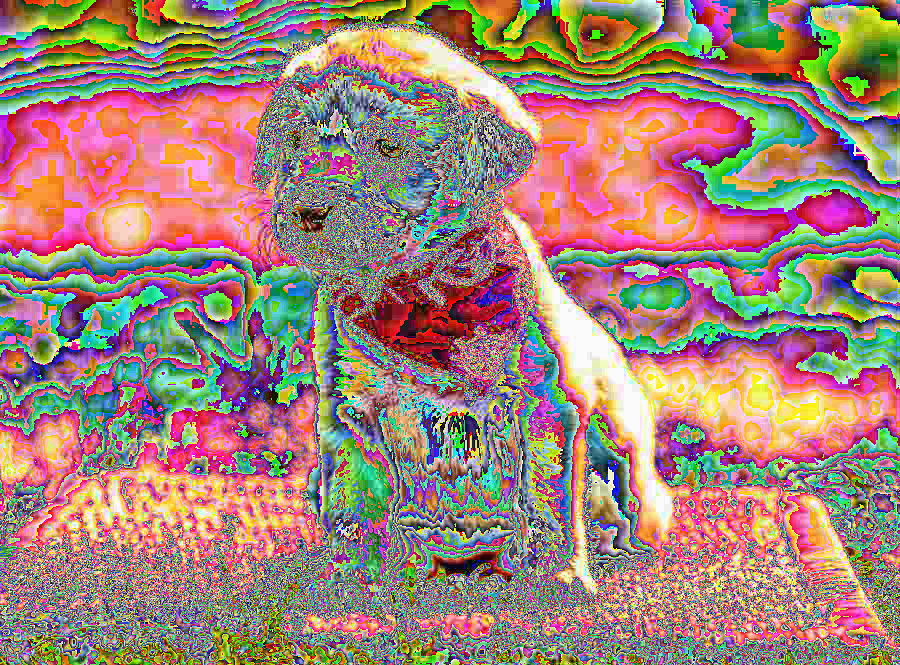

In [4]:
mean = [0.5, 0.5, 0.5]
std = [0.1, 0.1, 0.1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std), 
    transforms.ToPILImage() 
])

img_pil_normal = transform(img_pil)
img_pil_normal

<br>**<font color = blue size=5>* 影像 Resize </font>**

<br><font color = black size=4>
    將PIL影像進行影像縮放到固定大小</font>

<br>**<font color = black size=5>參數設定:</font>**
<br><font color = black size=4>
- size: 可以設定一個固定長寬值，也可以長寬分別設定
        ex: size=200 或是  size = (height, width) = (50,40)
- interpolation: 圖在縮放採用的插值方法，default為PIL.Image.BILINEAR
       還有其他方法PIL.Image.NEAREST, PIL.Image.BILINEAR and PIL.Image.BICUBIC.可以選擇
</font>


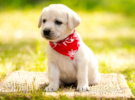

In [5]:
size = 100
transform =  transforms.Resize(size)
new_img = transform(img_pil)
new_img

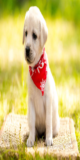

In [6]:
size = (160, 80)
transform =  transforms.Resize(size)
new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 CenterCrop</font>**

<br><font color = black size=4>
   以圖片(PIL Image)中心點往外延伸設定的大小(size)範圍進行圖像切割。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- size: 可以設定一個固定長寬值，也可以長寬分別設定
            如果設定大小超過原始影像大小，則會以黑色(數值0)填滿。
      ex: size=200 則是以中心點出來，長寬個擷取200個pixels。
          size = (height, width) = (200,300)，長擷取200個pixel，寬擷取300個pixels 
</font>
   

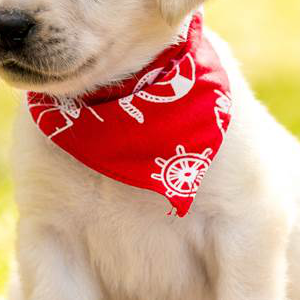

In [7]:
size = 300
transform = transforms.Compose([
    transforms.CenterCrop(size),
])
new_img = transform(img_pil)
new_img

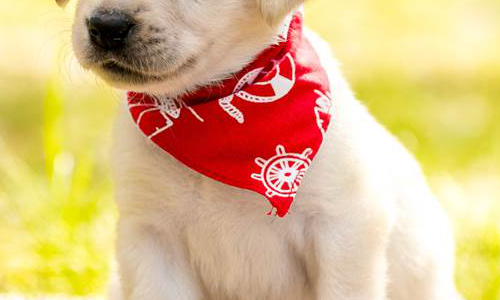

In [8]:
size = (300,500)
transform = transforms.Compose([
    transforms.CenterCrop(size),
])
new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 Pad </font>**

<br><font color = black size=4>
   以圖片(PIL Image)外部往外延伸填充寬度和高度，填充值為pad值。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- padding: 填充寬度和高度，可以為一個值(四個邊都用給予同樣的延伸)，或是分別對應四個邊設定。
- fill:  填充的值
             設定一個值則是所有channel都填這個值
             或是分別對三個channel分別設定，
             須設定padding_mode=constant
- padding_mode: 填充模式
                . constant: 填充固定數字
                . edge:邊緣的值直接往外延伸
                . reflect: 從邊緣往內一個pixel進行鏡射
                . symmetric:從邊緣鏡射
</font>

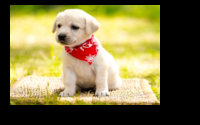

In [9]:
padding = (10, 5, 40, 20)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, fill=0,padding_mode="constant"), 
])
new_img = transform(img_pil)
new_img

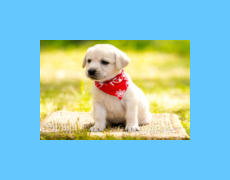

In [10]:
padding = 40
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, fill=(100,200,255),padding_mode="constant"), 
])
new_img = transform(img_pil)
new_img

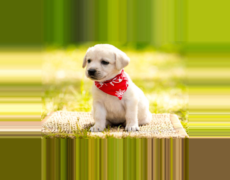

In [11]:
padding = (40, 40, 40, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, padding_mode="edge"), 
])
new_img = transform(img_pil)
new_img

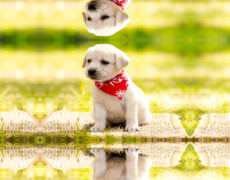

In [12]:
padding = (40, 40, 40, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, padding_mode="symmetric"), 
])
new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 RandomCrop </font>**

<br><font color = black size=4>
   以圖片(PIL Image)中隨機裁減一塊圖像出來。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- size: 填充寬度和高度，可以為一個值(寬度和高度都用給予同樣的延伸)，或是分別對應寬度和高度設定。
- padding:  參照**影像Pad**部分
- pad_if_needed: 是否需要填充，True or False
- fill: 參照**影像Pad**部分
- padding_mode: 參照**影像Pad**部分
</font>

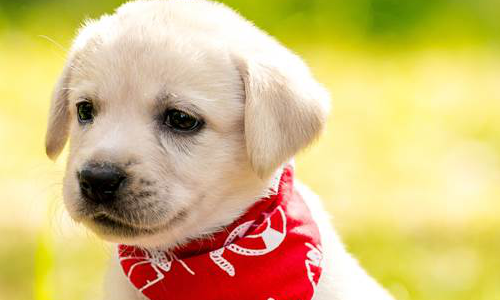

In [13]:
size=(300, 500)
transform = transforms.Compose([
    transforms.RandomCrop(size)
])
new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 RandomHorizontalFlip 和 RandomVerticalFlip </font>**

<br><font color = black size=4>
   圖片(PIL Image)會在給定的機率下隨機進行水平或是垂直翻轉。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- p: 圖片要進行翻轉的機率。
</font>

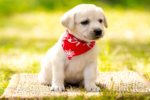

In [14]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomHorizontalFlip(p=0.9),
])

new_img = transform(img_pil)
new_img

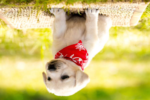

In [15]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomVerticalFlip(p=0.9),
])

new_img = transform(img_pil)
new_img


<br>**<font color = blue size=5> * 影像 RandomResizedCrop </font>**

<br><font color = black size=4>
   圖片(PIL Image)會在給定的機率下隨機 裁切到隨機給定的大小並且resize到設定的大小。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- size: 圖片最後要輸出的大小。
- scale: 裁切圖片為原始突變的比例(default為0.08-1.0)
- ratio: 裁切圖片的原始長寬比(default:3/4-4/3)。
- interpolation: check **影像 Resize**。
</font>


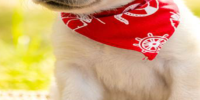

In [16]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((100, 200))
])

new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 TenCrop </font>**

<br><font color = black size=4>
   圖片(PIL Image)裁減一張圖得四個角圖片以及中間的圖片到指定大小(size)，並且進行水平或是垂直翻轉等。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
    - size: 圖片最後要輸出的大小。
    - vertical_flip: 是否垂直翻轉，預設為水平翻轉(default:False)
</font>


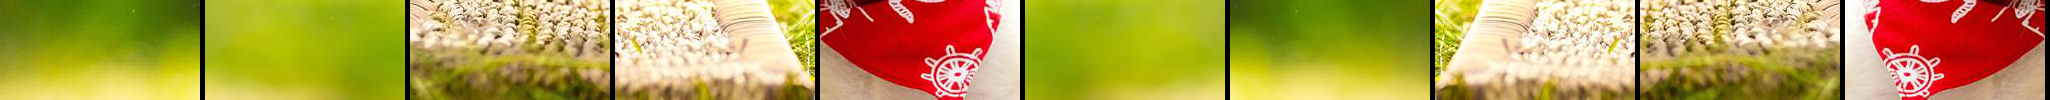

In [17]:
UNIT_SIZE=200
size = (100, UNIT_SIZE)

transform = transforms.Compose([
    transforms.TenCrop(size, vertical_flip=False)
])

new_img = transform(img_pil)

delta = 50 
new_img_2 = Image.new("RGB", (UNIT_SIZE*10+delta, 100))
top_right = 0
for im in new_img:
    new_img_2.paste(im, (top_right, 0)) 
    top_right += UNIT_SIZE + int(delta/10) 

new_img_2

<br>**<font color = blue size=5> * 影像 GaussianBlur </font>**

<br><font color = black size=4>
   圖片(PIL Image or torch tensor)高斯模糊化
    如果為torch tensor影像必須為[…, C, H, W]。<br>
                                … means an arbitrary number of leading dimensions
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- kernel_size: 高斯kernel的大小。
- sigma: 高斯kernel生成的標準差，sigma值需為
      1. float: (float)，sigma固定在設定的float值
      2. tuple: (min, max)，sigma在(min, max)隨機取出一個值。
</font>

> <br><font color = black size=4>這段的code不能執行，因為我是用Windows系統，目前2021/2/24 torchvision能支援windows的版本為0.5.0，高斯模糊為torchvision 0.7.0以上才支援
refernce: https://stackoverflow.com/questions/65304189/gaussianblur-transform-not-found-in-torchvision-transforms
</font>

In [18]:
# transform = transforms.Compose([
#     transforms.GaussianBlur(7,3)
# ])
# new_img = transform(img_pil)
# new_img

<br>**<font color = blue size=5> * 影像 RandomAffine </font>**

<br><font color = black size=4>
   圖片(PIL Image or torch tensor)保持中心不變的圖像的隨機仿射變換。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- degrees: 旋轉角度， 設定為0代表不做圖片旋轉。
       1. float or int: 角度在(-degrees,+degrees)隨機取一個。
       2. tuple: (min, max)，角度在(min, max)隨機取出一個值。
- translate: 水平和垂直平移，defalut為不做平移。
           ex: translate=(a, b)，水平部分會隨機在(-img_width*a, img_width*a) 平移
                                 垂直部分會隨機在(-img_height*b, img_height*b) 平移
- scale: 縮放參數，為一個區段設定，defalut為keep原始圖片大小。
            (a,b)縮放參數會在a-b之間隨機抽出一個數字。
- shear: 圖像裁減參數，可以參考**Crop**的設定，defalut為不做裁減。
- resample:An optional resampling filter
               參考 https://pillow.readthedocs.io/en/latest/handbook/concepts.html#filters
- fillcolor:圖像外部填充的顏色。 (Tuple for RGB Image and int for grayscale) 。
</font>

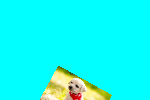

In [19]:

transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomAffine(degrees=(-30,30), translate=(0, 0.5), scale=(0.4, 0.5), shear=(0,0), fillcolor=(0,255,255))
])

new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 Grayscale 和 RandomGrayscale </font>**

<br><font color = black size=4>
   Grayscale將圖片(PIL Image or torch tensor)轉換成灰階。
    </font>

<br>**<font color = black size=5>Grayscale 參數設定:</font>** 
<br><font color = black size=4>
    - num_output_channels (int，(1 or 3)): 輸出圖像要幾個channel
        * 1: image is single channel
        * 3: image is 3 channel with r == g == b
</font>

<br>**<font color = black size=5>RandomGrayscale 參數設定:</font>** 
<br><font color = black size=4>
    - p: 圖片要進行轉換灰階的機率。
</font>

**note**: RandomGrayscale和 Grayscale不同，如果輸入是channel數是1，輸出的灰階則是1個chnnel，如果輸入是三個channel，則輸出3 channel with r == g == b。


original shape: (665, 900, 3)
shape: (100, 150)


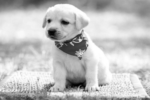

In [20]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Grayscale(num_output_channels=1)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
new_img

original shape: (665, 900, 3)
shape: (100, 150, 3)


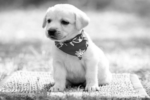

In [21]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Grayscale(num_output_channels=3)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
new_img

original shape: (665, 900, 3)
shape: (100, 150, 3)


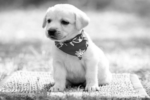

In [22]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomGrayscale(p=0.9)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
new_img

<br>**<font color = blue size=5> * 影像 RandomPerspective </font>**

<br><font color = black size=4>
   圖片(PIL Image or torch tensor)在給定的機率執行給定圖像的隨機透視變換。。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
    - distortion_scale (float): 控制失真(distortion)程度，範圍為0-1，default:0.5。
    - p (float):執行轉換的機率，default: 0.5。
    - interpolation (int): Interpolation type。
    - fill (n-tuple or int or float): 當圖扭曲後，圖外滿要填滿的值。
</font>

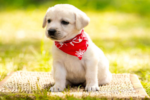

In [23]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=2)
])
new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 ColorJitter </font>**

<br><font color = black size=4>
   隨機調整圖片的亮度(brightness)、對比(contrast)、飽和度(saturation)和色調(hue)。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- brightness: (float or tuple(min, max)) 亮度
                  從[max(0, 1-brightness), 1+brightness]隨機取一個值，或是[min, max]，須為非負數。
- contrast: (float or tuple(min, max)) 對比
                  從[max(0, 1-contrast), 1+contrast]隨機取一個值，或是[min, max]，須為非負數。
- saturation: (float or tuple(min, max)) 飽和度
                  從[max(0, 1-saturation), 1+saturation]隨機取一個值，或是[min, max]，須為非負數。
- hue: (float or tuple(min, max)) 色調
                  從[-hue, hue]隨機取一個值，或是[min, max],但hue必須設定在[0,0.5]或-0.5<=min<=max<=0.5。  
</font>


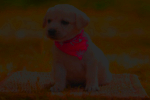

In [24]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.ColorJitter(brightness=(0, 5), contrast=(
        0, 5), saturation=(0, 5), hue=(-0.1, 0.1))
])

new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 RandomRotation </font>**

<br><font color = black size=4>
   將圖片隨機旋轉。
    </font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- degrees: (float or tuple(min, max)) 旋轉角度
                  從[-degrees, degrees]隨機取一個值，或是[min, max]。
- resample: 選轉後的圖，外圍補值方式。
- expand: (True or False) 
          True: 將輸出圖況大到可以容納整張原始圖。
          False: 輸出圖跟輸入圖一樣大，所以可能因為旋轉導致圖像被切斷。
- center: (n-tuple or int or float) 在圖片的哪個位置做為中心進行旋轉，default: None (圖的正中心旋轉)。
- fill: 同**pad**函數填滿方式，default: 0。
</font>

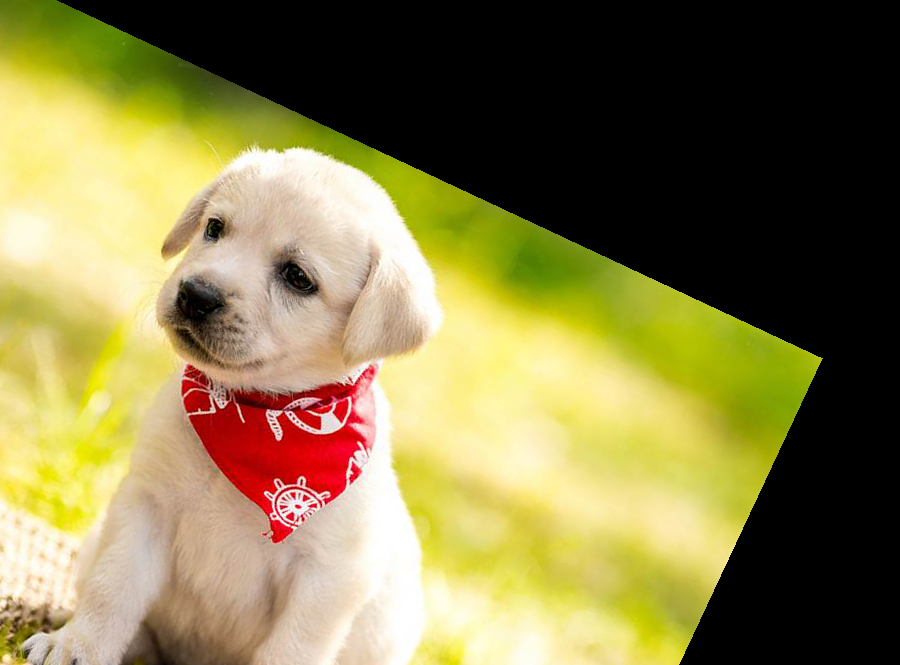

In [25]:
transform = transforms.Compose([
    transforms.RandomRotation(30, resample=Image.BICUBIC, expand=False, center=(55, 5))
])
new_img = transform(img_pil)
new_img

-------
<br>**<font color = Red size=6> 將轉換的function組合串起來使用</font>**


<br>**<font color = blue size=5> * 影像 RandomApply </font>**

<br><font color = black size=4>
    從給定的機率下隨機執行全部的設定轉換組合。
</font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- transforms (list or tuple or torch.nn.Module): list of transformations。
- p (float):probability，default: 0.5。
</font>


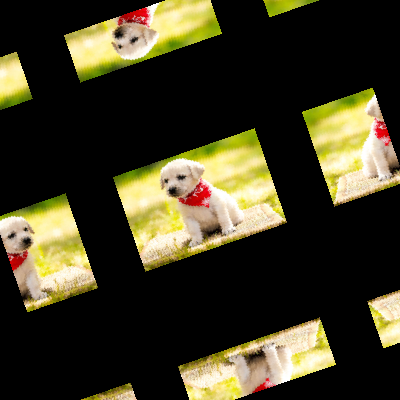

In [26]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(100, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter()
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomApply(transform_set, p=0.5)
])

new_img = transform(img_pil)
new_img

<br>**<font color = blue size=5> * 影像 RandomChoice 和 RandomOrder </font>**

<br><font color = black size=4>
    RandomChoice: 從設定的轉換組合隨機選取一個轉換執行。<br>
    RandomOrder:  從設定的轉換組合隨機打亂，全部執行。
</font>

<br>**<font color = black size=5>參數設定:</font>** 
<br><font color = black size=4>
- transforms (list or tuple or torch.nn.Module): list of transformations。
</font>


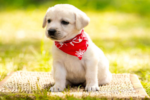

In [27]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(20, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter()
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomChoice(transform_set)
])

new_img = transform(img_pil)
new_img

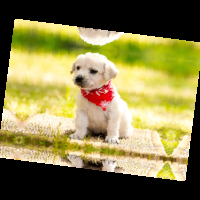

In [28]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(20, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter()
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomOrder(transform_set)
])

new_img = transform(img_pil)
new_img